# Music Genre Classifier
--- 
## Imports:

In [110]:
# Usual Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Librosa - for audio and music processing
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

print("Succesfully imported libraries")

Succesfully imported libraries


In [20]:
# Download Dataset:

import kagglehub
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\janmi\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1


### The Data Folder contains:

* **genres original folder** (collection of 10 genres - each with 100 thirty second long audio files)
* **images original folder** (visual representation for each audio file)
* **features_30_seconds.csv file**  (containing features of the audio files)
* **features_3_seconds.csv file**   (same structure - but this time the songs were split into 3-second parts -> More Data) 

In [15]:
print(list(os.listdir(f'{path}\Data')))

['features_30_sec.csv', 'features_3_sec.csv', 'genres_original', 'images_original']


---

## Explore Audio Data

In [81]:
# Import one file...
y, sr = librosa.load(f'{path}\\Data\\genres_original\\blues\\blues.00014.wav')

print('y: ', y, '\n')
print('y shape: ', np.shape(y), '\n')
print('Sample Rate (KHz): ', sr, '\n')

print("Length of Audio(samples/samplerate): ", 661794/sr, "sec")

y:  [0.07705688 0.11590576 0.09234619 ... 0.07122803 0.06323242 0.04721069] 

y shape:  (661794,) 

Sample Rate (KHz):  22050 

Length of Audio(samples/samplerate):  30.013333333333332 sec


In [40]:
# Trim silence in the beginning an end:
audio_file, _ = librosa.effects.trim(y)

print("Audio File: ", audio_file, "\n")
print("Audio File shape: ", np.shape(audio_file))

Audio File:  [0.07705688 0.11590576 0.09234619 ... 0.07122803 0.06323242 0.04721069] 

Audio File shape:  (661794,)


## 2D Representation:

Text(0.5, 1.0, 'Sound waves in Blues.00014.wav')

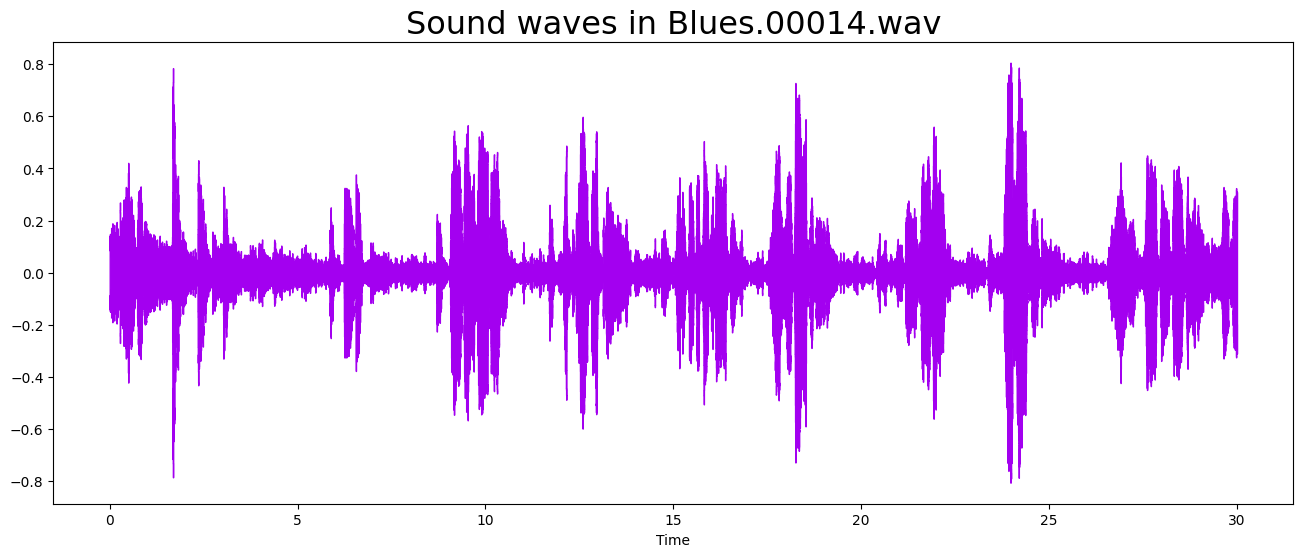

In [43]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F0");
plt.title("Sound waves in Blues.00014.wav", fontsize=23)

### Fourier Transform:

* integral transform that takes a signal function as input and outputs another function that describes the extent to which various frequencies are present in the input function

* The transform contains both the y-axis(frequency) to log scale and the "color" axis (amplitude)

In [46]:
n_fft = 2048
hop_length = 512

# Short-time Fourier transform
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

print("Shape of D object: ", np.shape(D))



Shape of D object:  (1025, 1293)


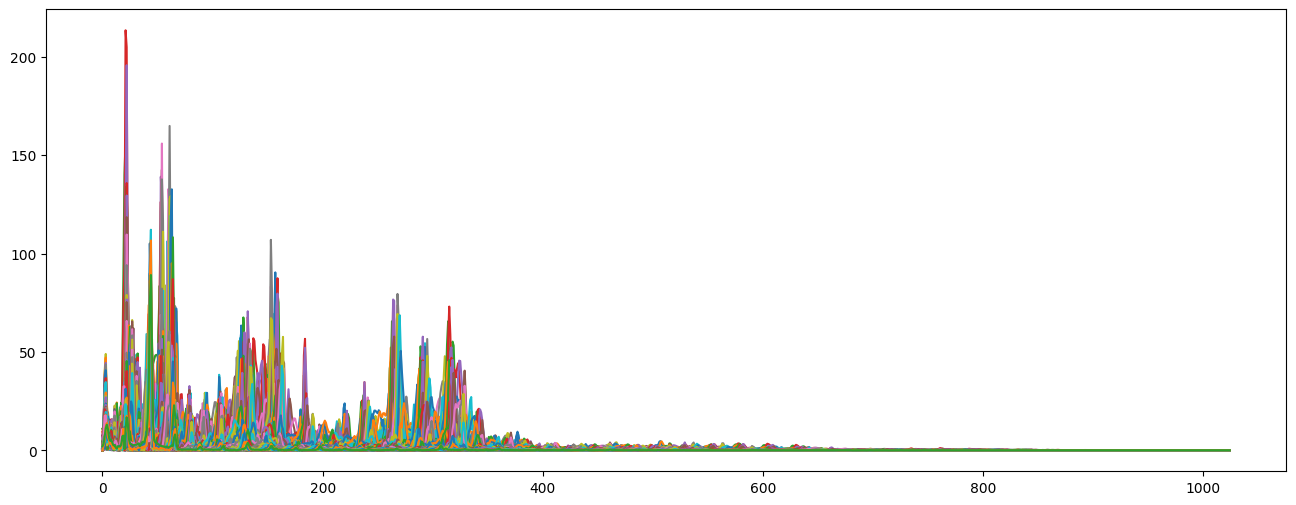

In [52]:
plt.figure(figsize=(16,6))
plt.plot(D);

### FFT-Spectogram:

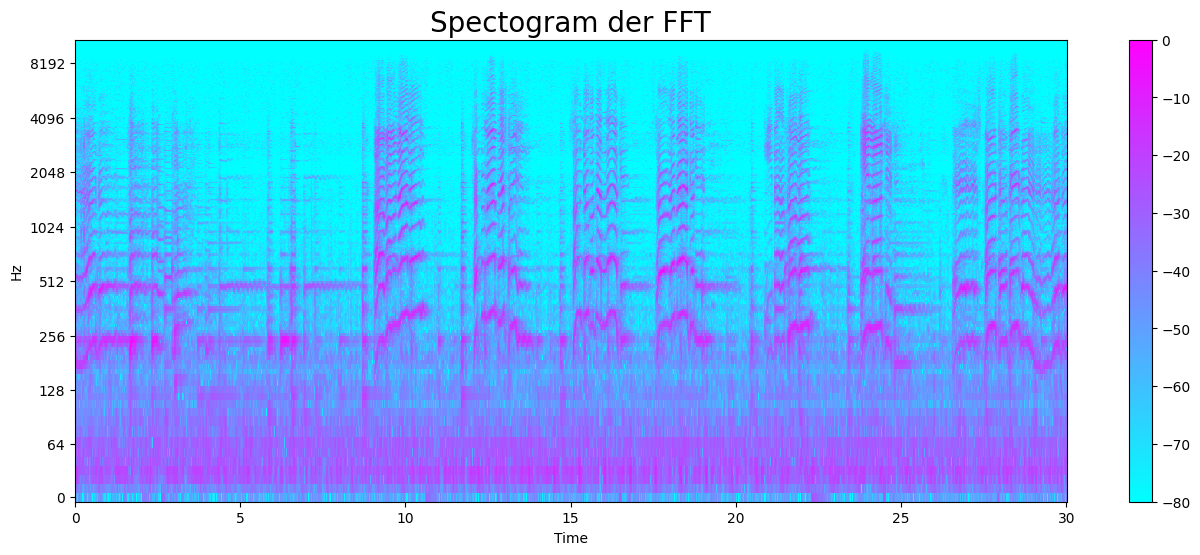

In [ ]:
# Convert amplitude spectrogram to decibel-scaled spectogram
DB = librosa.amplitude_to_db(D, ref = np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(DB, y_axis='log', x_axis='time', sr=sr, hop_length=hop_length, cmap= 'cool')
plt.title('Spectogram der FFT', fontsize=20)
plt.colorbar();
plt.show()

### Mel Spectogram

Text(0.5, 1.0, 'Mel Spectogram')

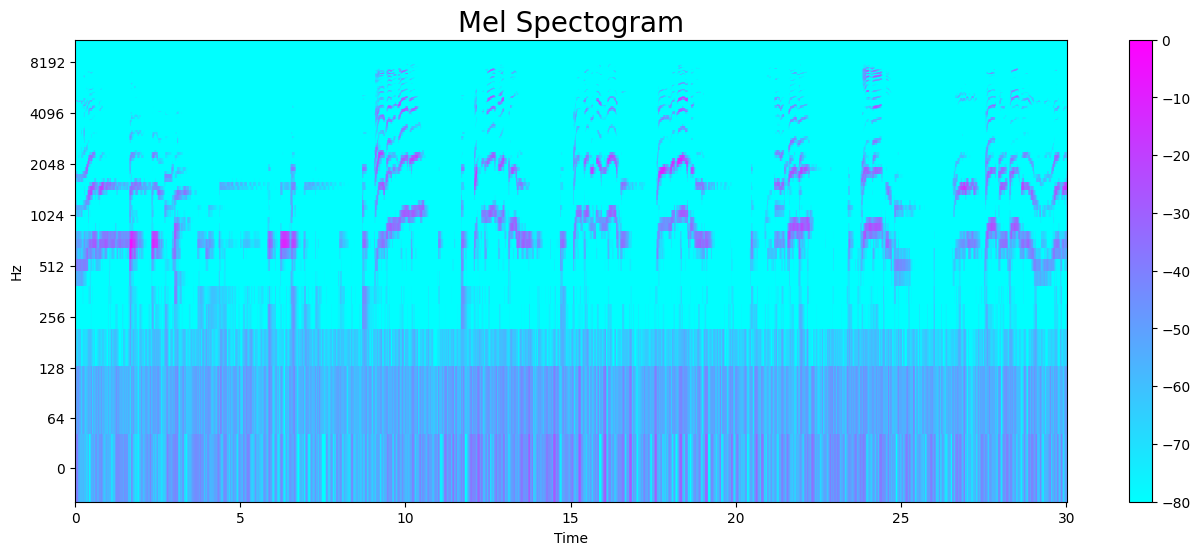

In [85]:
y_trim, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y_trim, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', cmap='cool');
plt.colorbar();
plt.title('Mel Spectogram', fontsize=20)

## Audio Features

### Zero Crossing Rate

* the rate at which the signal changes between positive and negative

In [93]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print("Zero Crossings: ", sum(zero_crossings))

Zero Crossings:  29848


### Harmonics and Perceptrual

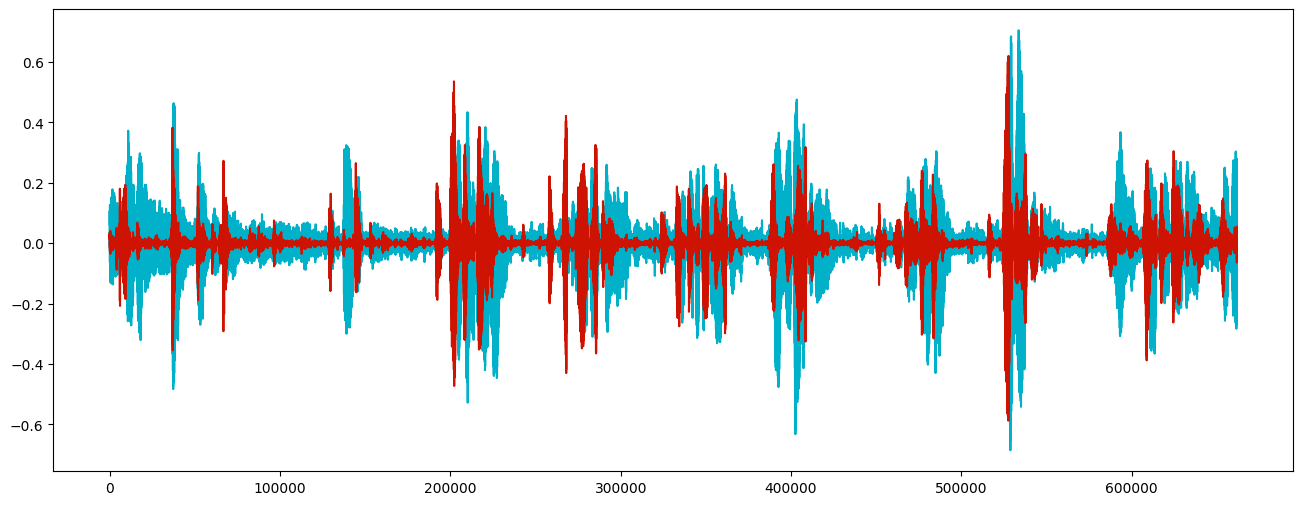

In [100]:
y_harmonic, y_perceptrual = librosa.effects.hpss(audio_file)

plt.figure(figsize=(16,6))
plt.plot(y_harmonic, color="#00B1C9");
plt.plot(y_perceptrual, color="#CF1302")

### BPM (Tempo)

In [103]:
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print("Tempo in BPM:", tempo)

Tempo in BPM: [151.99908088]


### Spectral Centroid

* a measure used in digital signal processing to characterise a spectrum
* indicates where the center of mass of the spectrum is located 
* perceptually, it has a robust connection with the impression of brightness of a sound

In [111]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

print('Centroids: ', spectral_centroids, '\n')
print('Shape of Spectral Centroids: ', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames: ', frames, '\n')
print('t: ', t)

# Normalize Sound Data Function
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids:  [1293.29055131 1073.68120637 1046.09452531 ... 1012.97491477  971.62397679
  856.50461324] 

Shape of Spectral Centroids:  (1293,) 

frames:  range(0, 1293) 

t:  [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


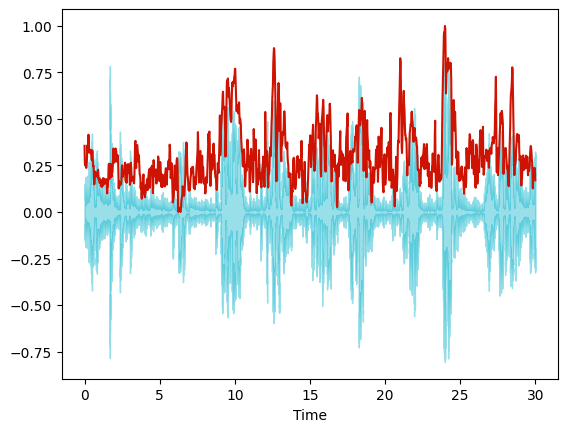

In [118]:
plt.Figure(figsize=(16,6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#00B1C9');
plt.plot(t, normalize(spectral_centroids), color='#CF1302' );


### Spectral Rollof

* The spectral roll-off point is defined as the frequency below which a specified proportion of the total energy of the spectrum is contained

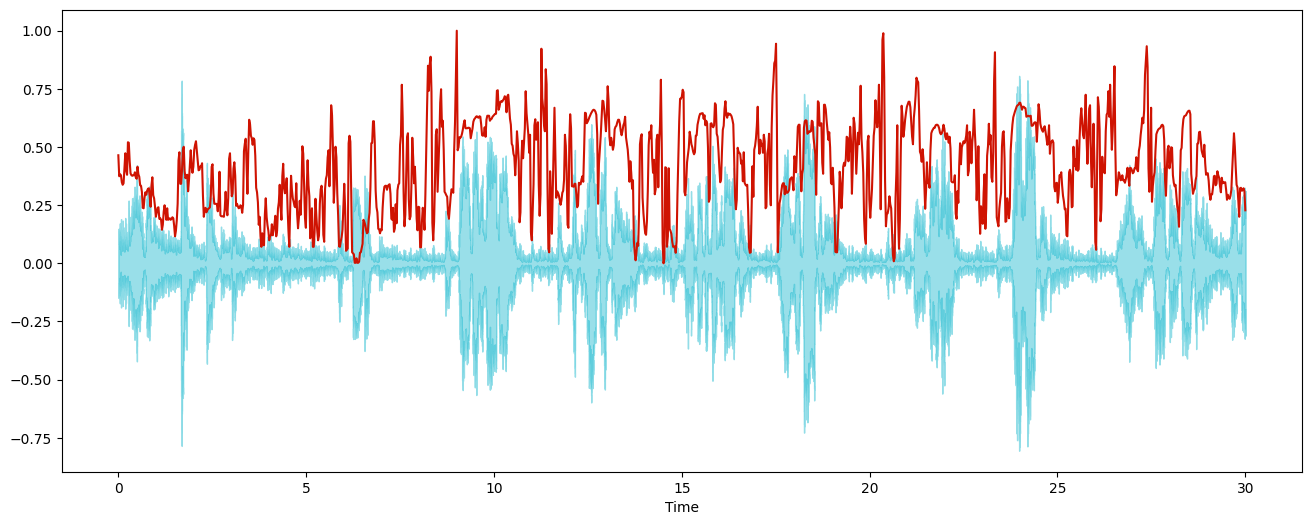

In [121]:
spectral_rollof = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color='#00B1C9')
plt.plot(t, normalize(spectral_rollof), color='#CF1302')

### Mel-Frequency Cepstral Coefficients (MFCCs):

* The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape:  (20, 1293)


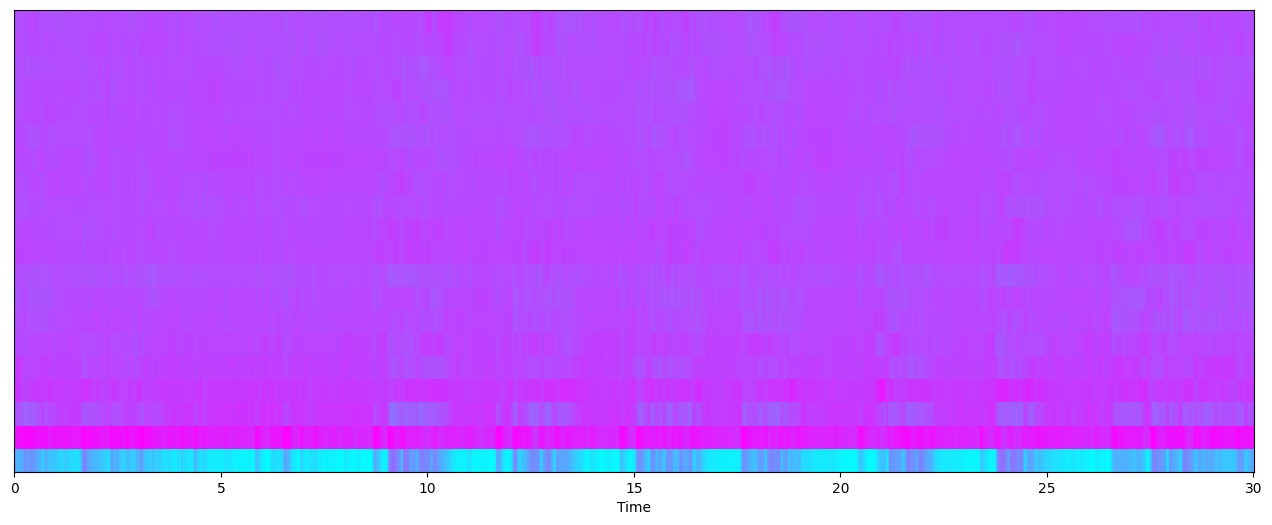

In [123]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape: ', mfccs.shape)

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool')

#### ... scale data

Mean:  1.1801075e-09 

Var:  1.0


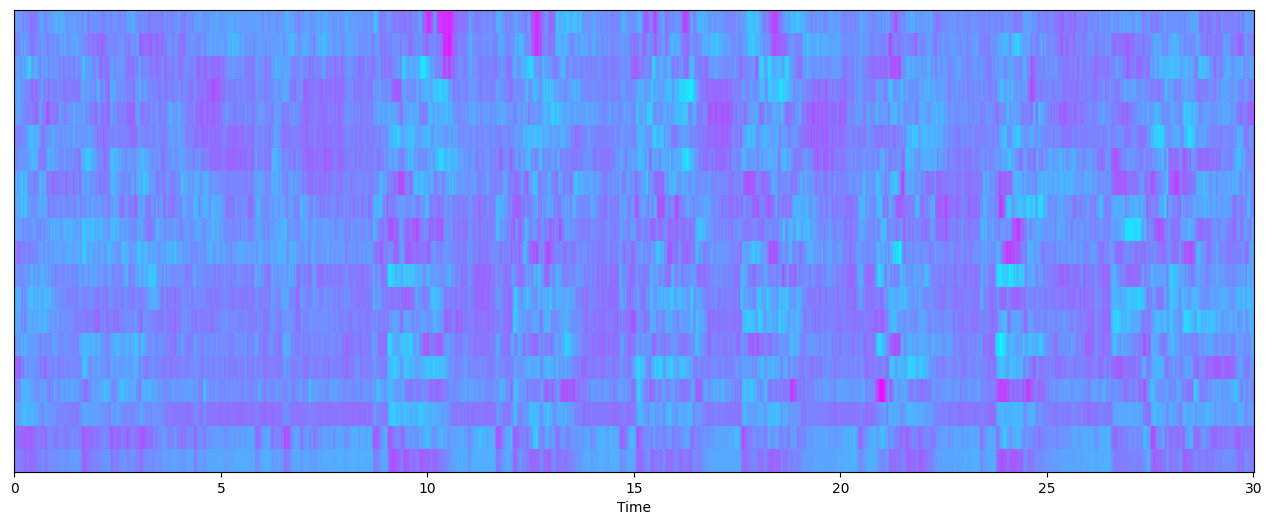

In [125]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean: ', mfccs.mean(), '\n')
print('Var: ', mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='cool');

### Chroma STFT / Chroma Frequencies

* Chroma-STFT is a methode of calculating chroma-characteristics from an audio-signal
* Short-Term-Fourier-Transform is applied
* Data is assigned to the 12 pitches (C-B)


Chromagra shape:  (12, 133)


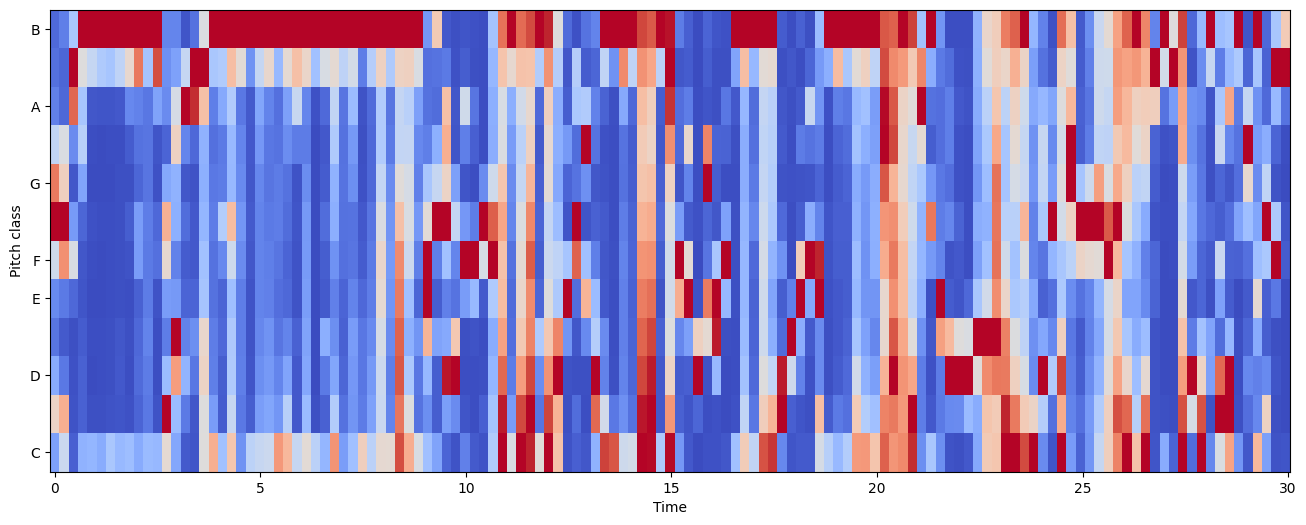

In [130]:
# Adjust hop_length to change how granular you want your data to be
hop_length = 5000

chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromagra shape: ', chromagram.shape)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

---
# Exploratory Data Analysis
